In [5]:
import numpy as np
import matplotlib.pyplot as plt
from utils import load_data

# Load the data
X_train, y_train = load_data()


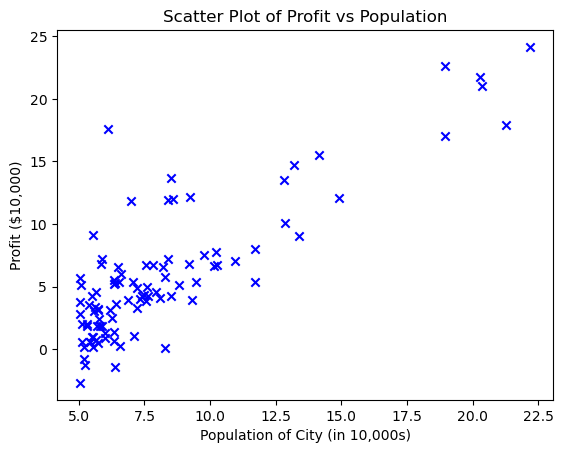

In [7]:
plt.scatter(X_train, y_train, color='blue', marker='x')
plt.xlabel('Population of City (in 10,000s)')
plt.ylabel('Profit ($10,000)')
plt.title('Scatter Plot of Profit vs Population')
plt.show()


In [10]:
# load the dataset
x_train, y_train = load_data()
# Print x_train
print("Type of x_train:", type(x_train))
print("First five elements of x_train are:\n", x_train[:5]) 

# Print y_train
print("Type of y_train:", type(y_train))
print("First five elements of y_train are:\n", y_train[:5]) 

# Check the dimensions of the variables
print("Shape of x_train:", x_train.shape)
print("Shape of y_train:", y_train.shape)
print ('Number of training examples (m):', len(x_train))

Type of x_train: <class 'numpy.ndarray'>
First five elements of x_train are:
 [6.1101 5.5277 8.5186 7.0032 5.8598]
Type of y_train: <class 'numpy.ndarray'>
First five elements of y_train are:
 [17.592   9.1302 13.662  11.854   6.8233]
Shape of x_train: (97,)
Shape of y_train: (97,)
Number of training examples (m): 97


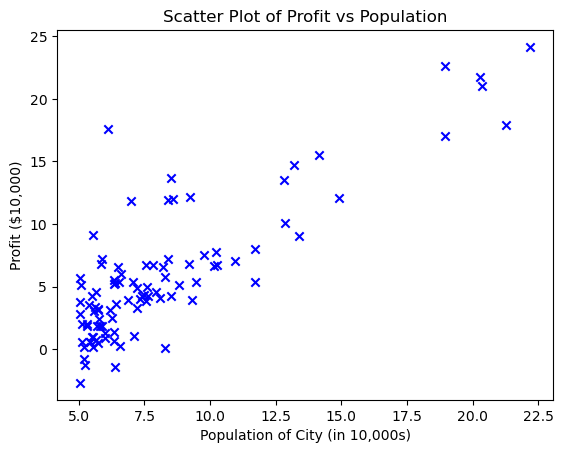

In [15]:
# Create a scatter plot
plt.scatter(x_train, y_train, color='blue', marker='x')
plt.xlabel('Population of City (in 10,000s)')
plt.ylabel('Profit ($10,000)')
plt.title('Scatter Plot of Profit vs Population')
plt.show()


In [16]:
# GRADED FUNCTION: compute_cost

def compute_cost(x, y, w, b): 
    """
    Computes the cost function for linear regression.
    
    Args:
        x (ndarray): Shape (m,) Input to the model (Population of cities) 
        y (ndarray): Shape (m,) Label (Actual profits for the cities)
        w, b (scalar): Parameters of the model
    
    Returns:
        total_cost (float): The cost of using w,b as the parameters for linear regression
               to fit the data points in x and y
    """
    # number of training examples
    m = x.shape[0] 
    
    # Compute the predicted values
    predictions = w * x + b
    
    # Compute the squared errors
    squared_errors = (predictions - y) ** 2
    
    # Calculate the total cost
    total_cost = 1 / (2 * m) * np.sum(squared_errors)
    
    return total_cost


In [17]:
# Compute cost with some initial values for parameters w, b
initial_w = 2
initial_b = 1

cost = compute_cost(x_train, y_train, initial_w, initial_b)
print(type(cost))
print(f'Cost at initial w: {cost:.3f}')


<class 'numpy.float64'>
Cost at initial w: 75.203


In [18]:
# GRADED FUNCTION: compute_gradient

def compute_gradient(x, y, w, b): 
    """
    Computes the gradient for linear regression 
    Args:
      x (ndarray): Shape (m,) Input to the model (Population of cities) 
      y (ndarray): Shape (m,) Label (Actual profits for the cities)
      w, b (scalar): Parameters of the model  
    Returns
      dj_dw (scalar): The gradient of the cost w.r.t. the parameters w
      dj_db (scalar): The gradient of the cost w.r.t. the parameter b     
    """
    
    # Number of training examples
    m = x.shape[0]
    
    # You need to return the following variables correctly
    dj_dw = 0
    dj_db = 0
    
    # Compute the predictions
    predictions = w * x + b
    
    # Compute the errors
    errors = predictions - y
    
    # Compute the gradients
    dj_dw = (1 / m) * np.sum(errors * x)
    dj_db = (1 / m) * np.sum(errors)
        
    return dj_dw, dj_db


In [19]:
# Compute and display gradient with w initialized to zeros
initial_w = 0
initial_b = 0

tmp_dj_dw, tmp_dj_db = compute_gradient(x_train, y_train, initial_w, initial_b)
print('Gradient at initial w, b (zeros):', tmp_dj_dw, tmp_dj_db)


Gradient at initial w, b (zeros): -65.32884974555671 -5.839135051546392


In [20]:
# Compute and display cost and gradient with non-zero w
test_w = 0.2
test_b = 0.2
tmp_dj_dw, tmp_dj_db = compute_gradient(x_train, y_train, test_w, test_b)

print('Gradient at test w, b:', tmp_dj_dw, tmp_dj_db)

Gradient at test w, b: -47.41610118114433 -4.007175051546392


Iteration    0: Cost     6.74
Iteration  150: Cost     5.31
Iteration  300: Cost     4.96
Iteration  450: Cost     4.76
Iteration  600: Cost     4.64
Iteration  750: Cost     4.57
Iteration  900: Cost     4.53
Iteration 1050: Cost     4.51
Iteration 1200: Cost     4.50
Iteration 1350: Cost     4.49
w, b found by gradient descent: 1.166362350335582 -3.6302914394043597


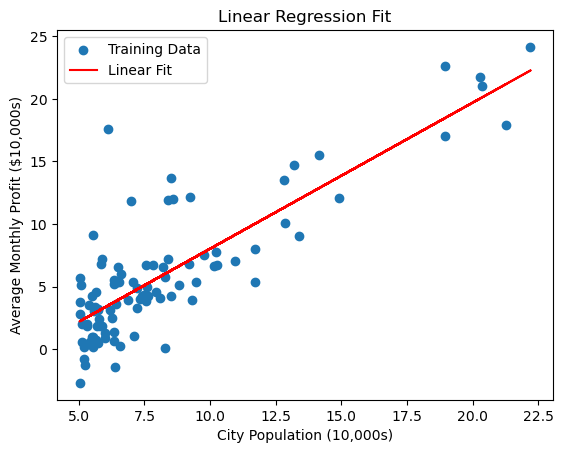

In [21]:
import copy
import math
import matplotlib.pyplot as plt

# Function to perform batch gradient descent
def gradient_descent(x, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters): 
    m = len(x)
    J_history = []
    w_history = []
    w = copy.deepcopy(w_in)
    b = b_in
    
    for i in range(num_iters):
        dj_dw, dj_db = gradient_function(x, y, w, b )  
        w = w - alpha * dj_dw               
        b = b - alpha * dj_db               
        
        if i < 100000:
            cost = cost_function(x, y, w, b)
            J_history.append(cost)
        
        if i % math.ceil(num_iters / 10) == 0:
            w_history.append(w)
            print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.2f}")
        
    return w, b, J_history, w_history

# Initialize fitting parameters
initial_w = 0.0
initial_b = 0.0

# Gradient descent settings
iterations = 1500
alpha = 0.01

# Perform gradient descent
w, b, _, _ = gradient_descent(x_train, y_train, initial_w, initial_b, 
                              compute_cost, compute_gradient, alpha, iterations)

print("w, b found by gradient descent:", w, b)

# Plot the linear fit
plt.scatter(x_train, y_train, label="Training Data")
plt.plot(x_train, w * x_train + b, color='red', label="Linear Fit")
plt.xlabel("City Population (10,000s)")
plt.ylabel("Average Monthly Profit ($10,000s)")
plt.legend()
plt.title("Linear Regression Fit")
plt.show()


In [22]:
m = x_train.shape[0]
predicted = np.zeros(m)

for i in range(m):
    predicted[i] = w * x_train[i] + b

Text(0.5, 0, 'Population of City in 10,000s')

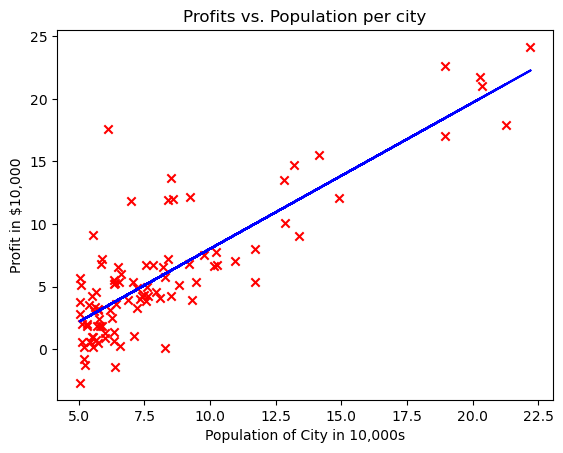

In [23]:
# Plot the linear fit
plt.plot(x_train, predicted, c = "b")

# Create a scatter plot of the data. 
plt.scatter(x_train, y_train, marker='x', c='r') 

# Set the title
plt.title("Profits vs. Population per city")
# Set the y-axis label
plt.ylabel('Profit in $10,000')
# Set the x-axis label
plt.xlabel('Population of City in 10,000s')

In [24]:
predict1 = 3.5 * w + b
print('For population = 35,000, we predict a profit of $%.2f' % (predict1*10000))

predict2 = 7.0 * w + b
print('For population = 70,000, we predict a profit of $%.2f' % (predict2*10000))

For population = 35,000, we predict a profit of $4519.77
For population = 70,000, we predict a profit of $45342.45
